# 1. Loading Data and Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set(rc={'figure.figsize': (12, 8)})

%matplotlib inline

In [2]:
df = pd.read_csv("Dataset/ds_salaries.csv")

In [3]:
df.shape

(3755, 11)

In [4]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


## Comment:
We can drop 2 column which are salary and salary_currency because salary has been converted to usd by column: salary_in_usd

In [6]:
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

#### Notes on inplace 
1. Using `inplace=True`:
```python
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)
```
This will drop the columns `'salary'` and `'salary_currency'` from the DataFrame `df` in-place, modifying the DataFrame directly.

2. Using `inplace=False`:
```python
new_df = df.drop(['salary', 'salary_currency'], axis=1)
```
This will create a new DataFrame `new_df` that is a copy of `df` with the specified columns `'salary'` and `'salary_currency'` dropped. The original DataFrame `df` will not be modified.

Note that when using `inplace=True`, the method doesn't return a new DataFrame, whereas with `inplace=False`, the method returns a new DataFrame without modifying the original one.

In [7]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [8]:
df.shape

(3755, 9)

## Conclusion:
- We have 3755 rows with 9 columns

- Quantitative Data: 3 columns which are: work_year, salary_in_usd, remote_ratio.

- Categorical Data: 6 columns which are: experience_level, employment_type, job_title, employee_residence, company_location, company_size


In [9]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No missing values to deal with!

# 2. Univariate Analysis
## 2.1. Dealing with Categorical Features
### Experience Level

In [10]:
df['experience_level'].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

There's 4 categorical values in column 'Experience Level', each are:

- EN, which refers to Entry-level / Junior. 
 
- MI, which refers to Mid-level / Intermediate.
 
- SE, which refers to Senior-level / Expert. 
 
- EX, which refers to Executive-level / Director. 

In [11]:
df['experience_level'] = df['experience_level'].replace({'SE': 'Senior-level / Expert', 
                                                         'MI': 'Mid-level / Intermediate', 
                                                         'EN': 'Entry-level / Junior', 
                                                         'EX': 'Executive-level / Director'})

In [12]:
df['experience_level'].value_counts()

Senior-level / Expert         2516
Mid-level / Intermediate       805
Entry-level / Junior           320
Executive-level / Director     114
Name: experience_level, dtype: int64

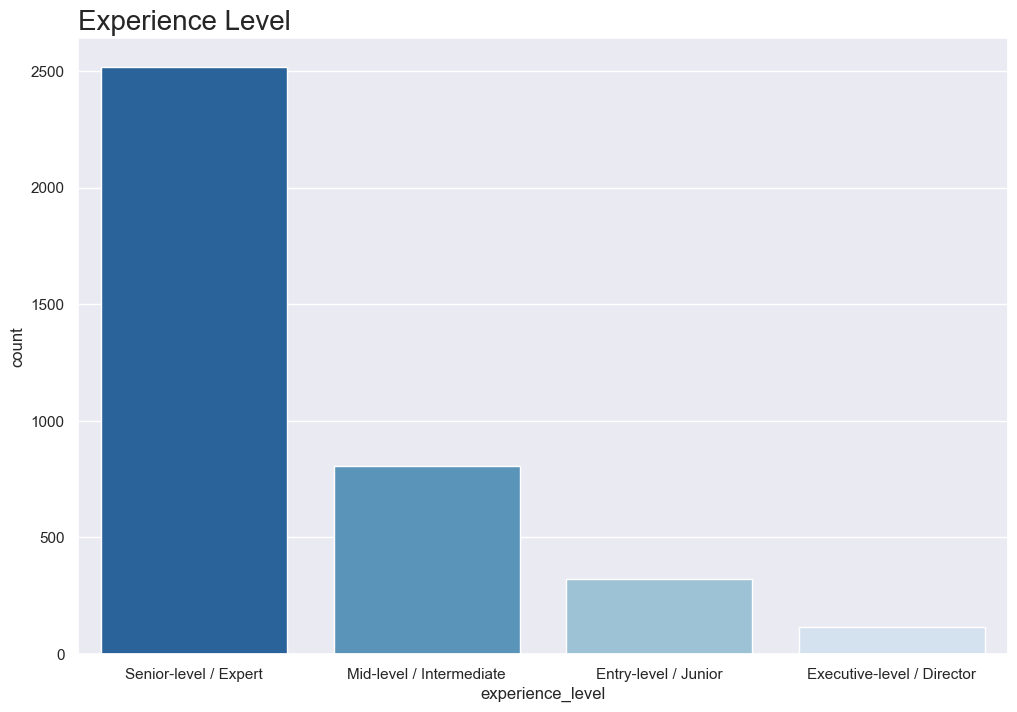

In [13]:
ax = sns.countplot(data=df, x='experience_level', palette = 'Blues_r')
ax.set_title('Experience Level', loc = 'left', fontsize = 20);

The countplot shows the distribution of individuals across different experience levels:

- Senior-level / Expert: 2516 individuals
- Mid-level / Intermediate: 805 individuals
- Entry-level / Junior: 320 individuals
- Executive-level / Director: 114 individuals

This indicates that the majority of individuals in the dataset fall into the senior-level or expert category, followed by mid-level, entry-level, and executive-level positions

The distribution of individuals across different experience levels could suggest that there are more senior-level or expert in the Data Science field, and that there may be more opportunities or demand for individuals with this level of experience. The smaller number of individuals at the entry-level or junior and executive-level or director experience levels could indicate that there may be fewer opportunities or less demand for individuals with these levels of experience in the field of data science.

### Job Designation

First, let have a look at how many jobs title in this dataset

In [14]:
df['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [15]:
distinct_job_titles = df['job_title'].nunique()
print(f"There are {distinct_job_titles} distinct job titles in this dataset.")

There are 93 distinct job titles in this dataset.


Next we will look for the most frequent job designations.

In [16]:
top_10_jobs = df['job_title'].value_counts().head(10)
top_10_jobs

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: job_title, dtype: int64

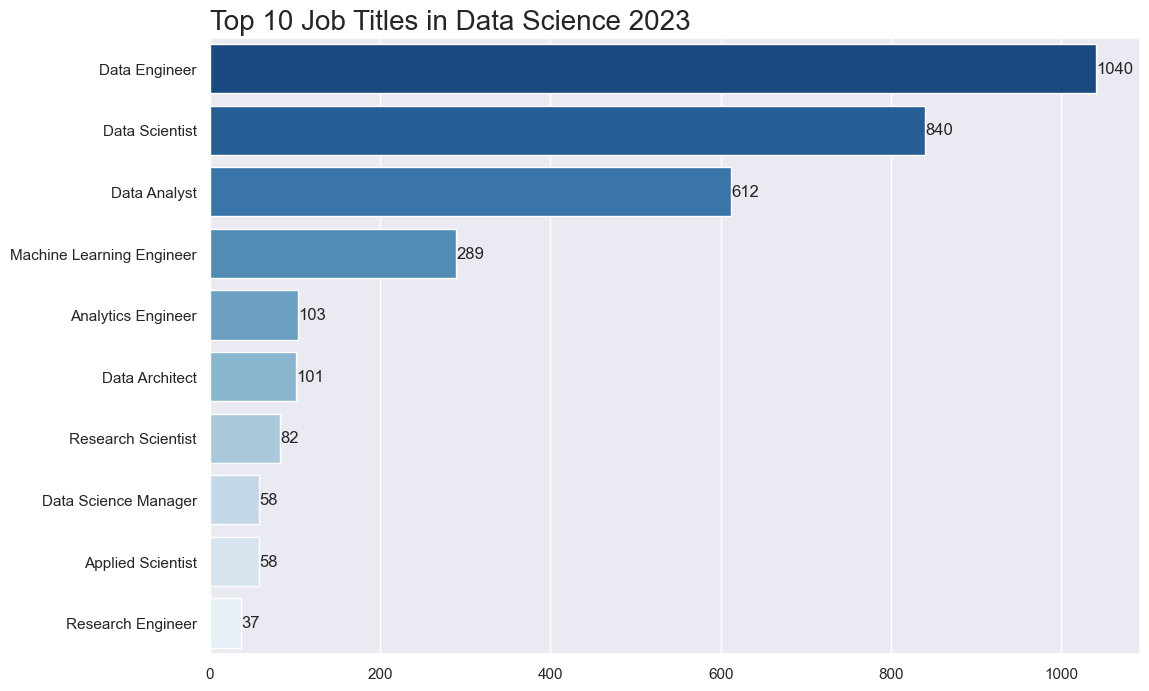

In [17]:
ax = sns.barplot(data = df, x = top_10_jobs.values, y = top_10_jobs.index, palette="Blues_r")

ax.set_title('Top 10 Job Titles in Data Science 2023', loc='left', fontsize=20)
# Add value labels to the bars
for i, v in enumerate(top_10_jobs.values):
    ax.text(v + 0.5, i, str(v), ha='left', va='center')

From the provided data of the top 10 job titles in Data Science for 2023, we can draw several insights:

1. **Data Engineer** and **Data Scientist** are the most common job titles in Data Science. This indicates the high demand for professionals who specialize in data engineering and data science.

2. **Data Analyst** is the third most common job title. Data analysts play a crucial role in analyzing and interpreting data to provide insights and support decision-making processes.

3. **Machine Learning Engineer** is another prominent job title in Data Science. Machine learning engineers focus on developing and implementing machine learning algorithms and models.

4. **Analytics Engineer** and **Data Architect** are also among the top 10 job titles. These roles involve designing and developing data architectures and systems to support analytics and data-driven initiatives.

5. **Research Scientist**, **Data Science Manager**, **Applied Scientist**, and **Research Engineer** are relatively less common job titles in the top 10. These roles indicate the presence of research-focused positions and managerial roles within the Data Science field.

Overall, the distribution of job titles in the top 10 suggests a diverse range of roles within the Data Science domain, including data engineering, data analysis, machine learning, analytics, research, and management. This diversity highlights the multidisciplinary nature of Data Science and the need for professionals with specialized skills in various areas to tackle complex data challenges and drive data-driven innovation.

### Employment Type

In [18]:
df['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [19]:
df['employment_type'] = df['employment_type'].replace({'FT':"Full-Time",
                                                       'PT': "Part-Time", 
                                                       'CT':"Contract",
                                                       'FL':"Freelance"})
employment_type = df['employment_type'].value_counts()

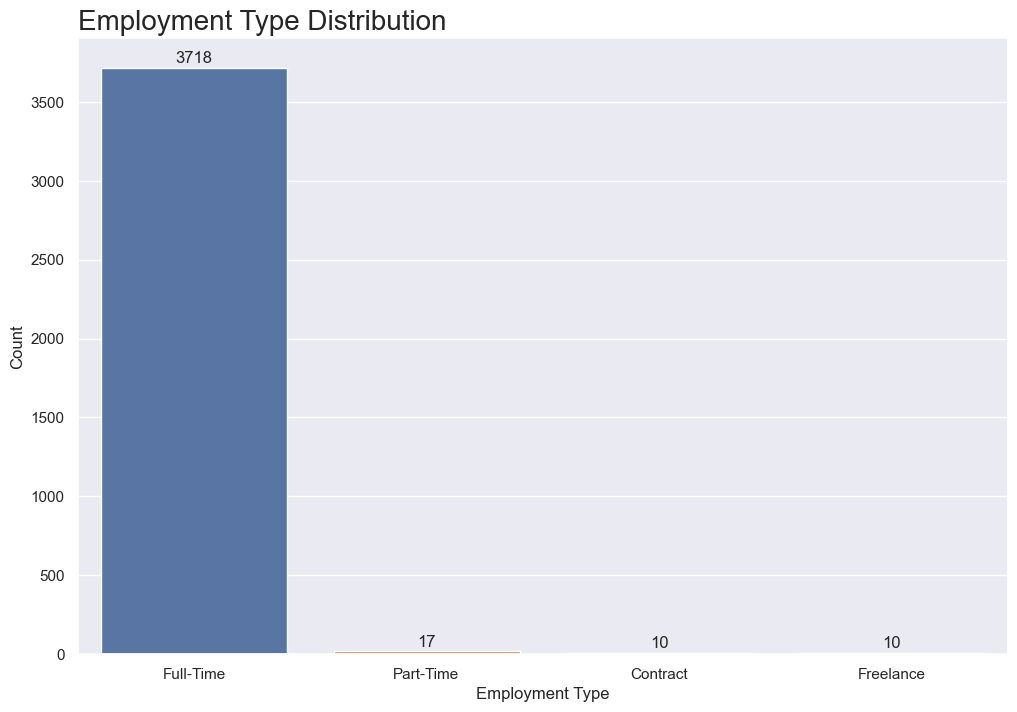

In [20]:
ax = sns.barplot(data = df, x = employment_type.index, y = employment_type.values)

# Add value labels to the bars
for i, v in enumerate(employment_type.values):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')
    
# Set labels and title    
ax.set_title('Employment Type Distribution', loc='left', size = 20)
ax.set_xlabel('Employment Type')
ax.set_ylabel('Count');


There are 4 employment types here :

- PT : Part-time

- FT : Full-time

- CT : Contract

- FL : Freelance

Almost the entirety of employee type is full-time.

### Relation between Employee Residence and Company Location


In [21]:
df['employee_residence'].value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [22]:
df['company_location'].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

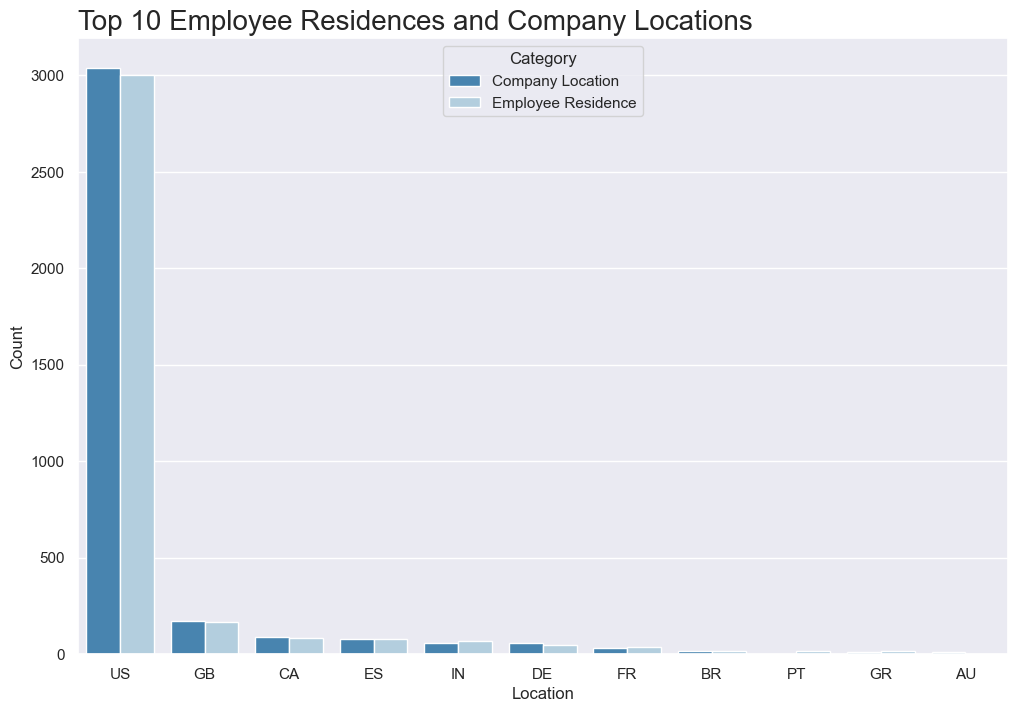

In [23]:
# Calculate the top 10 employee residences and company locations
employee_residence_counts = df['employee_residence'].value_counts().head(10)
company_location_counts = df['company_location'].value_counts().head(10)

# Combine the two Series into a single DataFrame
data = pd.DataFrame({
    'Employee Residence': employee_residence_counts,
    'Company Location': company_location_counts,
})

# Reshape the data using the melt function
data = data.reset_index().melt(
    id_vars='index', var_name='Category', value_name='Count'
)

# Sort the data by count
data = data.sort_values('Count', ascending=False)

# Create a grouped bar chart
sns.barplot(x='index', y='Count', hue='Category', data=data, orient='v', palette='Blues_r')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Employee Residences and Company Locations', loc='left', size=20);

Most of the employees are from USA, followed by Great Britain and Canada

The majority of employees are from the United States, followed by the United Kingdom, Canada, Spain, and India. The majority of companies are also located in the United States, followed by the United Kingdom, Canada, Spain, and India. 

The residence and company location data align to some extent, with the highest number of employees residing and working in the US. It suggests that there may be a higher concentration of data science professionals and companies in the US compared to other countries.

It's worth noting that there are some slight differences in employee residence and company location counts for certain countries. For example, while the US has the highest counts in both categories, there are slight variations in the numbers (3004 for residence and 3040 for company location). This might be due to factors such as remote work arrangements, employees relocating, or the presence of satellite offices.

### Company Size

In [24]:
df['company_size'] = df['company_size'].replace({'L':"Large", 'M':"Medium",'S':"Small"})

In [25]:
company_sizes = df['company_size'].value_counts()

Text(0.0, 1.0, 'Company Size')

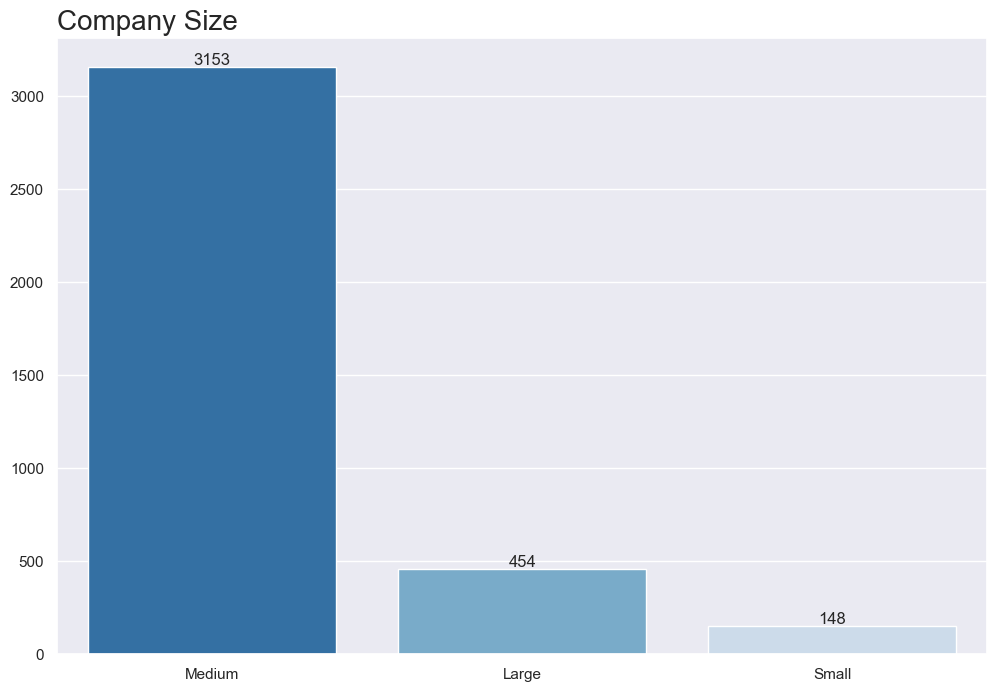

In [26]:
sns.barplot(x=company_sizes.index, y=company_sizes.values, palette="Blues_r")

for i, v in enumerate(company_sizes.values):
    plt.text(i, v, str(v), ha = 'center', va = 'bottom')
    
plt.title('Company Size', loc = 'left', size = 20)

Company size mostly consists of medium sized comapnies and then the large sized ones followed by the small sized startups.


## 2.2. Dealing with Numerical Features
### Work Year

In [27]:
# Calculate the count of each work_year category
work_year_counts = df['work_year'].value_counts()

# Calculate the proportion of each work_year category
work_year_proportions = work_year_counts.apply(lambda x: x / work_year_counts.sum()*100).round(1)

# Print the proportions
print(work_year_proportions)

2023    47.5
2022    44.3
2021     6.1
2020     2.0
Name: work_year, dtype: float64


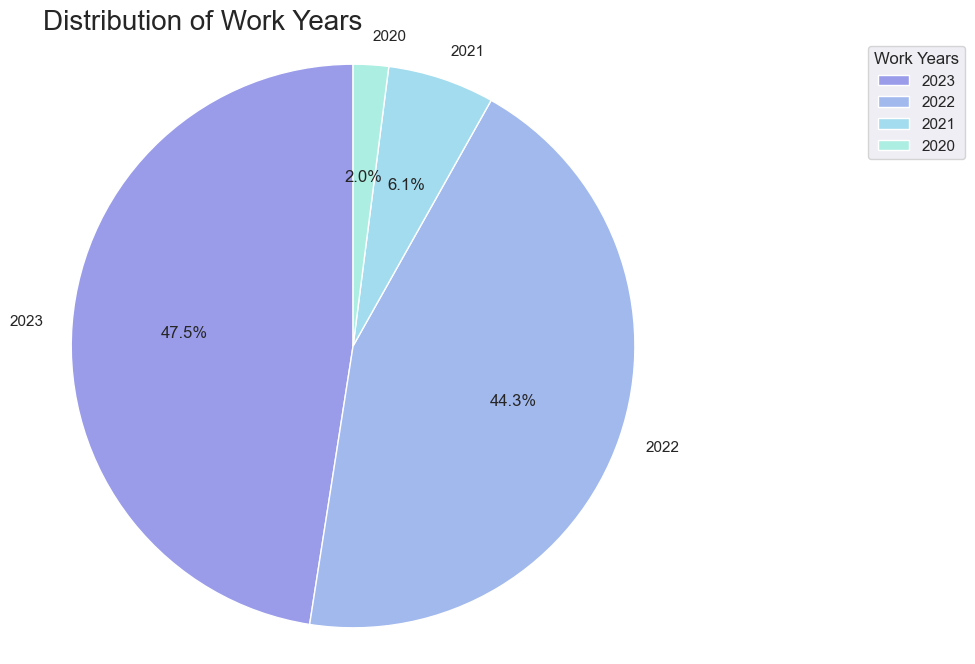

In [28]:
# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as per your preference

# Define colors for the pie slices
colors = ['#9A9CEA', '#A2B9EE', '#A2DCEE', '#ADEEE2']

# Create the pie chart with customizations
plt.pie(work_year_counts, labels=work_year_counts.index, autopct='%1.1f%%', startangle=90,
        colors=colors, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Add a title and legend
plt.title('Distribution of Work Years', loc = 'left', size = 20)
plt.legend(title='Work Years', loc='best', bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal');

2023 year data accounts for about 47% in the dataset, followed by 2022 and so. Goes on to show the tremendous growth in this field through the years!

### Salary in USD

In [29]:
df['salary_in_usd'].describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

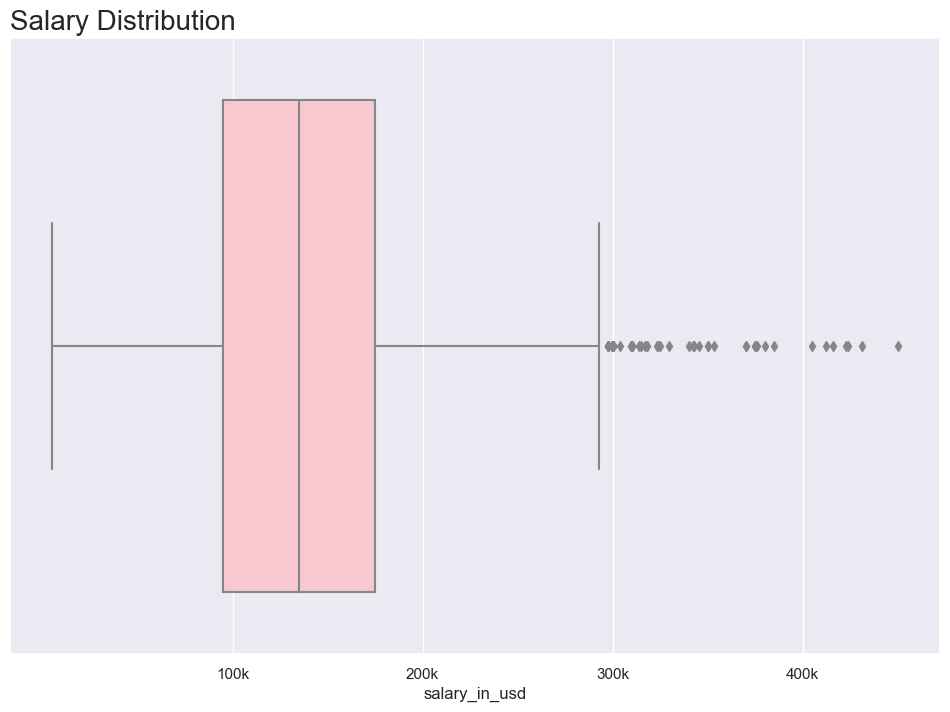

In [30]:
sns.boxplot(x=df['salary_in_usd'], color = "pink")
# Set title and x-axis label
plt.title('Salary Distribution', loc = 'left', size = 20)
# Set xticks to 100k, 200k, 300k, and 400k with labels
plt.xticks([100000, 200000, 300000, 400000], ['100k', '200k', '300k', '400k']);

The boxplot provides insights into the distribution of data science salaries. The box represents the interquartile range (IQR), where the middle 50% of the data falls. The whiskers extend from the box to the minimum and maximum values within 1.5 times the IQR.

- Median: The median salary, represented by the horizontal line inside the box, is 135K. This indicates that half of the salaries fall below this value.
- Range: The salaries range from 5.1K (minimum) to 300K (maximum). However, there are outliers present above 300K, suggesting a few data points with significantly higher salaries.
- Quartiles: The lower quartile (25th percentile) is 95K, and the upper quartile (75th percentile) is 175K. This indicates that 25% of the salaries fall below 95K, while 25% exceed 175K.
- Outliers: There are outliers present above 300K, indicating salaries that are significantly higher than the majority of the data points.

Overall, the boxplot suggests a right-skewed distribution of data science salaries, with the majority of salaries falling between 80K and 200K. The presence of outliers on the higher end indicates the existence of a few individuals with exceptionally high salaries, potentially due to seniority, specialized skills, or other factors.


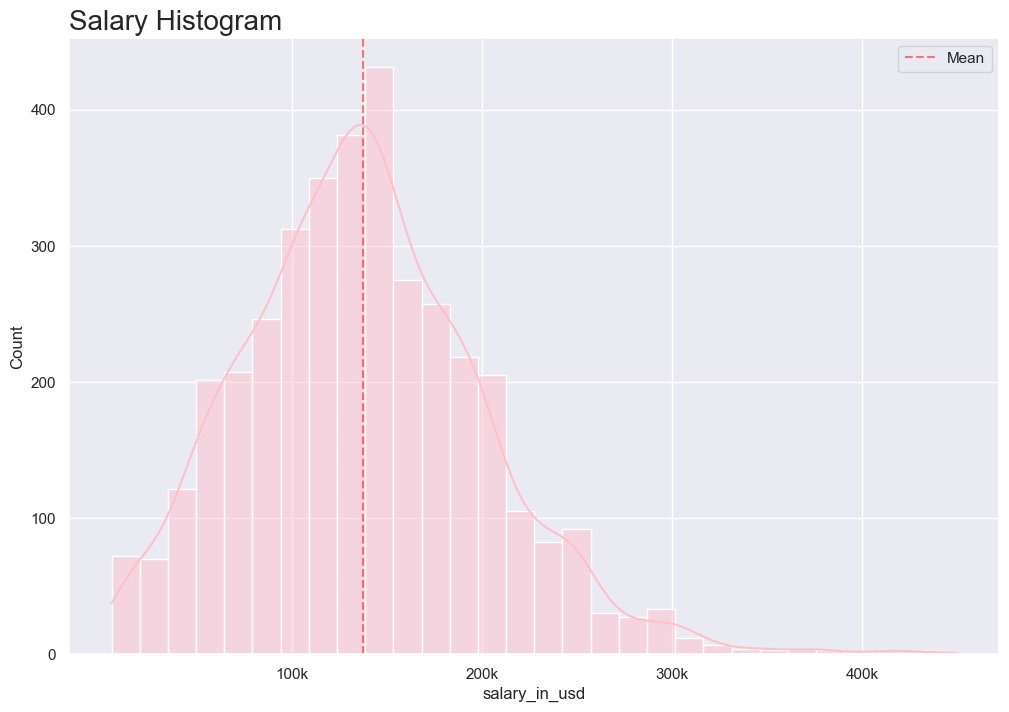

In [31]:
sns.histplot(df['salary_in_usd'], bins = 30, kde= True, color ='pink' )
plt.title('Salary Histogram', loc = 'left', size = 20)
# Set xticks to 100k, 200k, 300k, and 400k with labels
plt.xticks([100000, 200000, 300000, 400000], ['100k', '200k', '300k', '400k'])

plt.axvline(df['salary_in_usd'].mean(), color= 'red', linestyle = '--',label='Mean', alpha = 0.5)

# Add a legend
plt.legend();

The distribution of data science's salary is **skewed to the right**, centering around 140k with most of the data falling between 80k to 200k, spanning a range of approximately 450k. There are also **outliers** present on the higher end.


### Remote Ratio

Remote Ratio consists of 3 values :

- 0 : No remote work (less than 20%)

- 50 : Partially remote

- 100 : Fully remote (more than 80%)

In [32]:
df['remote_ratio'] = df['remote_ratio'].replace({100:'Fully Remote', 50:'Partially Remote', 0:'No Remote Work'})

In [33]:
remote_ratio = df['remote_ratio'].value_counts()
remote_ratio

No Remote Work      1923
Fully Remote        1643
Partially Remote     189
Name: remote_ratio, dtype: int64

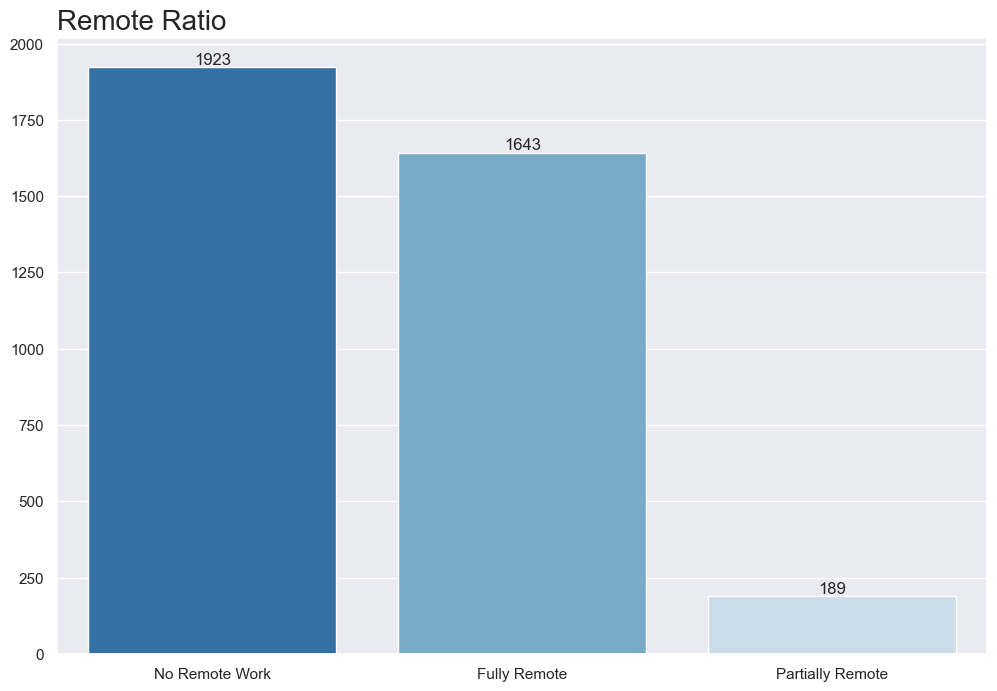

In [34]:
sns.barplot(x = remote_ratio.index, y = remote_ratio.values, palette = 'Blues_r')

for i, v in enumerate(remote_ratio.values):
    plt.text(i, v, str(v), ha = 'center', va = 'bottom')
    
plt.title('Remote Ratio', loc = 'left', size = 20);

As of 2023, Most companies still go the Fully Remote route, followed closely by the Hybrid/ Partially remote and then the No Remote poli

# 3. Multivariate Analysis
## 3.1.  
### Average Salary
#### Average Salary by Experience Level

In [35]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level / Expert,Full-Time,Principal Data Scientist,85847,ES,Fully Remote,ES,Large
1,2023,Mid-level / Intermediate,Contract,ML Engineer,30000,US,Fully Remote,US,Small
2,2023,Mid-level / Intermediate,Contract,ML Engineer,25500,US,Fully Remote,US,Small
3,2023,Senior-level / Expert,Full-Time,Data Scientist,175000,CA,Fully Remote,CA,Medium
4,2023,Senior-level / Expert,Full-Time,Data Scientist,120000,CA,Fully Remote,CA,Medium


In [36]:
average_salary = df.groupby('experience_level')['salary_in_usd'].mean().round(1).sort_values(ascending=False)

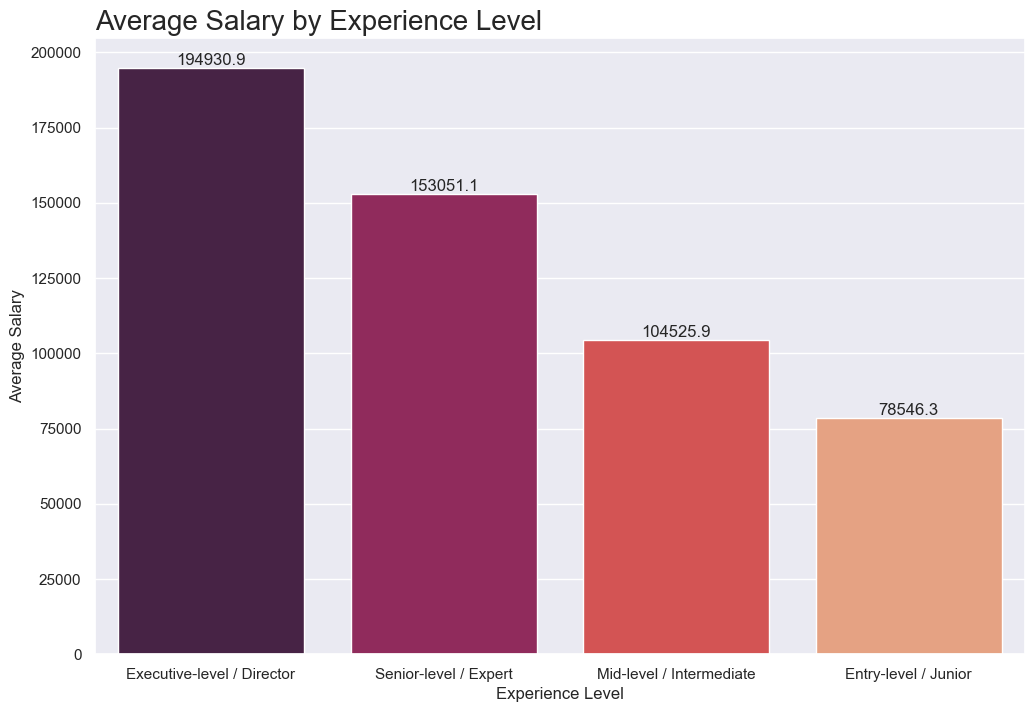

In [37]:
sns.barplot(x = average_salary.index, y = average_salary.values, palette = "rocket").set(xlabel = "Experience Level", ylabel = "Average Salary")
plt.title('Average Salary by Experience Level', loc = 'left', size = 20)

for i,v in enumerate(average_salary.values):
    plt.text(i,v,str(v), ha='center', va='bottom');

In Part 2, we computed the total number of individuals based on their experience level:

- Senior-level / Expert: There are 2516 individuals in this category.
- Mid-level / Intermediate: There are 805 individuals in this category.
- Entry-level / Junior: There are 320 individuals in this category.
- Executive-level / Director: There are 114 individuals in this category.

Despite having the smallest representation, the Executive-Level category exhibits the highest average salary. On the whole, there is a significant salary disparity between different experience levels. The largest gap is observed between Mid-level and Senior-level positions, with a difference of nearly 50k. Additionally, moving from Senior-level to Executive-level results in a further increment of approximately 40k.

#### Top 20 Average Salary by Job Titles

In [38]:
job_title_avg_salary = df.groupby('job_title')['salary_in_usd'].mean().round(0).sort_values(ascending = False).reset_index().head(20)

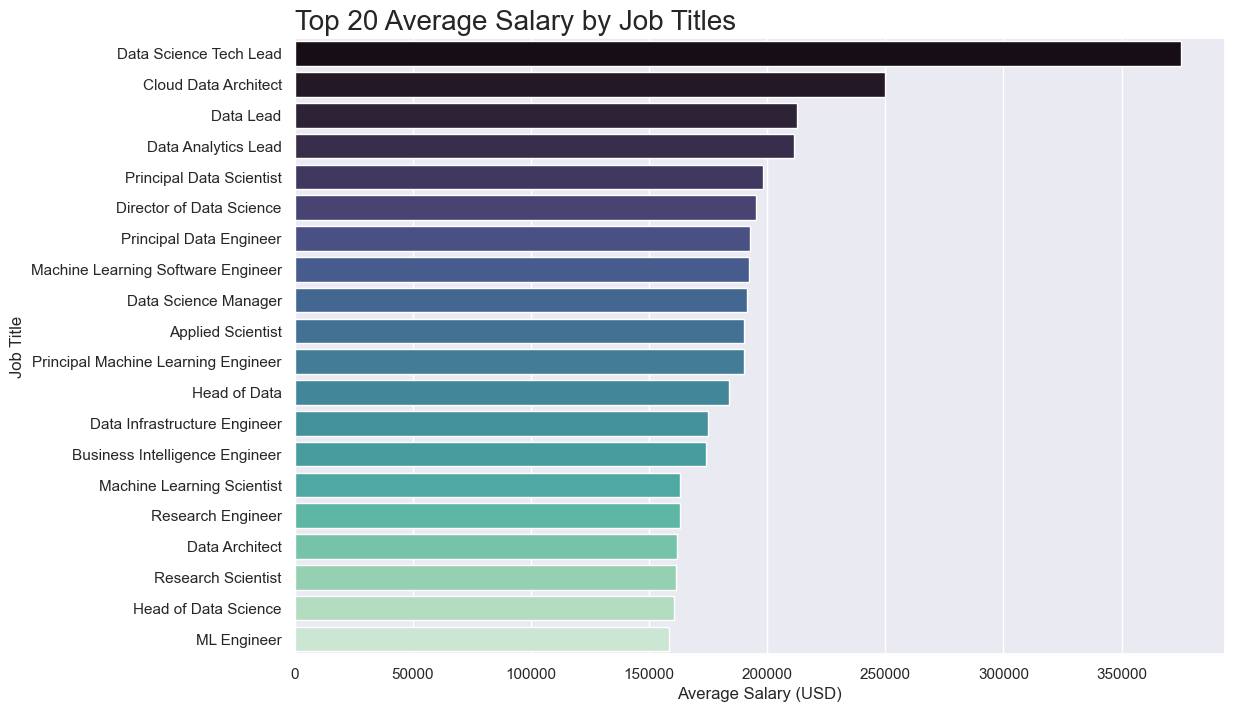

In [39]:
ax = sns.barplot(data = job_title_avg_salary , y = "job_title", x = "salary_in_usd", palette = 'mako')
ax.set(xlabel = "Average Salary (USD)", ylabel = "Job Title")

plt.title("Top 20 Average Salary by Job Titles", loc='left', size = 20);

#### Average Salary by Job Title (Top 6 Job Titles)

In [40]:
# Filter the data for the top 6 job titles
top_job_titles = ['Data Engineer', 
                  'Data Scientist', 
                  'Data Analyst', 
                  'Machine Learning Engineer', 
                  'Analytics Engineer', 
                  'Data Architect']
filtered_data = df[df['job_title'].isin(top_job_titles)]

In [41]:
# Calculate the average salary by job_title and experience_level
avg_sala_by_job_exp = filtered_data.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean().reset_index()
avg_sala_by_job_exp

,job_title,experience_level,salary_in_usd
0,Analytics Engineer,Entry-level / Junior,130000.000000
1,Analytics Engineer,Executive-level / Director,175125.000000
2,Analytics Engineer,Mid-level / Intermediate,102480.230769
3,Analytics Engineer,Senior-level / Expert,158404.024691
4,Data Analyst,Entry-level / Junior,59802.746032
5,Data Analyst,Executive-level / Director,120000.000000
6,Data Analyst,Mid-level / Intermediate,101516.622754
7,Data Analyst,Senior-level / Expert,119930.215789
8,Data Architect,Executive-level / Director,167500.000000
9,Data Architect,Mid-level / Intermediate,149714.285714


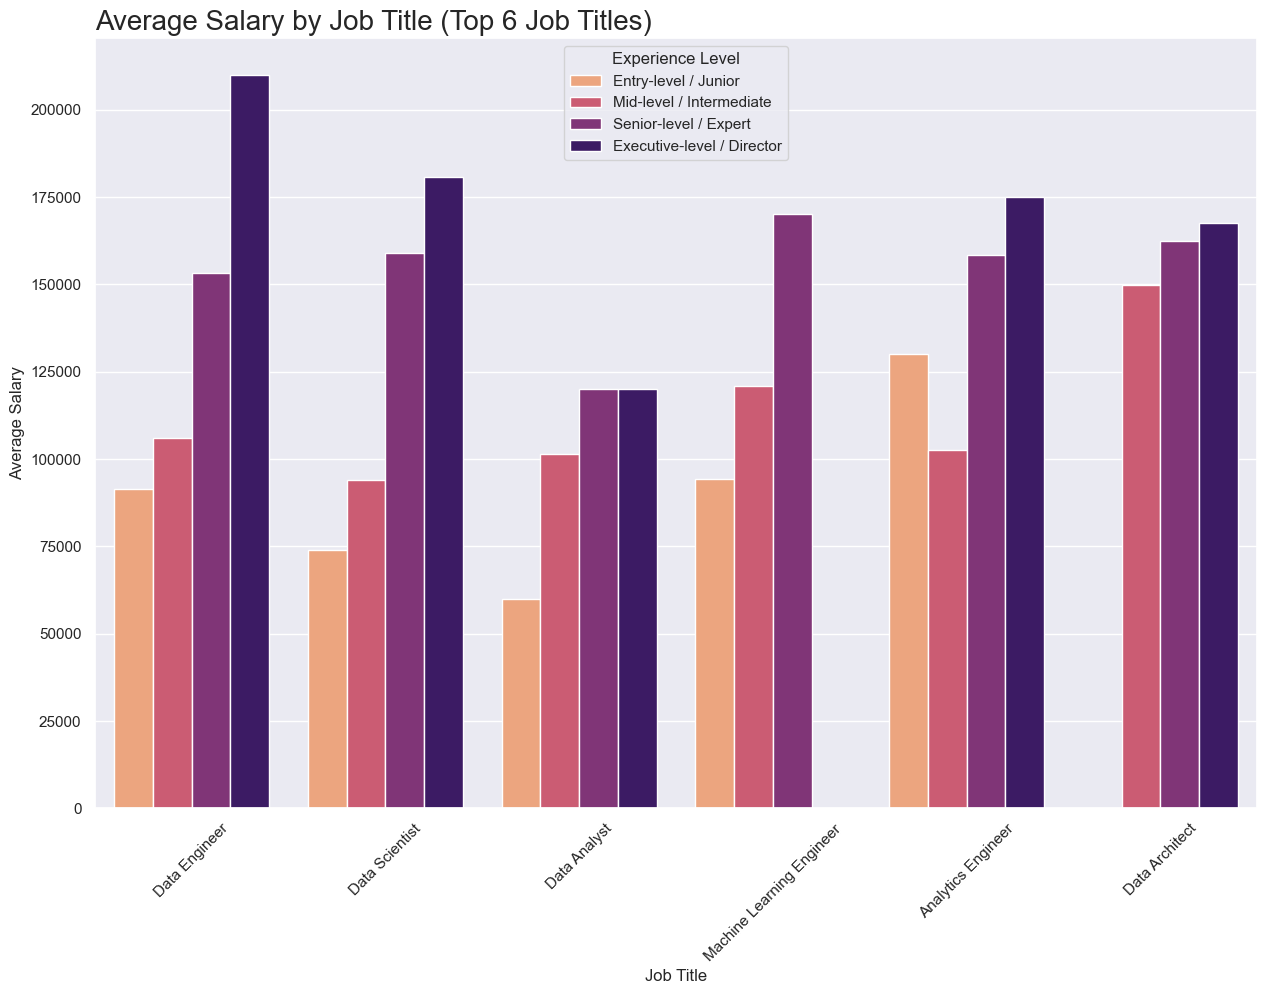

In [42]:
# Define the order of experience levels
experience_order = ['Entry-level / Junior', 
                    'Mid-level / Intermediate', 
                    'Senior-level / Expert', 
                    'Executive-level / Director']

plt.figure(figsize=(15, 10))
sns.barplot(x='job_title', y='salary_in_usd', hue='experience_level', 
            data=avg_sala_by_job_exp, 
            palette = 'magma_r', 
            order = top_job_titles, 
            hue_order=experience_order).set(xlabel = "Job Title", ylabel = 'Average Salary')

plt.title('Average Salary by Job Title (Top 6 Job Titles)', loc = "left", size = 20)

plt.xticks(rotation=45)

plt.legend(title='Experience Level');